<a href="https://colab.research.google.com/github/MWalve/CKD-Prediction/blob/main/CS_2810_Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mihir Walvekar

# Mini Project 2

Complete the Jupyter Notebook below working with a group of two to four students. Each student should submit their own Jupyter Notebook (this .ipynb file, after answering all questions within it) to [gradescope](https://www.gradescope.com/courses/).  While you may submit your work to gradescope anytime until **April 12 (Section 3) or April 13 (Sections 1 and 2) @ 11:59PM** my expectation is that most groups are able to complete the work and submit before the end of class today.

### Expectation:
You are not expected to write any code, but you will be asked to read and interpret code that you may never have seen before. Do not be afraid to ask for help from group mates, TAs or the professor.

### Instructions:
Click the "play" button in the code cell below. This "runs" the code. Any output will be displayed below the cell. You will be asked to this a few times in this Mini-Project. All answers will be written in cells like this, which can double-click to edit. Such cells are already provided (you do not need to create them) and currently say "respond-here-please".

In [5]:
# The below are some python modules that will be useful
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: School Lunch Markov Chain (30 points)

Every day, Nicole's mother packs her a lunch for school. She always receives an apple or a banana. She kept track last year of which days she received each, and recorded them in a data set: ([source](https://github.com/eaegerber/data/blob/main/schoollunch.csv)).

## Part 1.1
Nicole wants to build a Markov Chain so that she can predict whether she is going to receive an apple or banana each day of the next school year. First she must use the data she collected to estimate the transition probabilities for her Markov Chain. She writes the below code.

Read through each of the following four cells, reading the comments (everything in after a pound sign (`#`) is a comment), and then determine if Nicole has done everything correctly. **You will want to read the last cell very carefully, and perhaps write out by hand the Markov Chain to help.**

In the fifth cell, where it says "respond-here-please", discuss in a few sentences the mistake Nicole made. **Then fix it.**

In [6]:
url = 'https://raw.githubusercontent.com/eaegerber/data/main/schoollunch.csv'
schoollunch = pd.read_csv(url)

# cleaning data
schoollunch = np.array(schoollunch['x'])

# get the total number of days with apples and bananas
print(pd.value_counts(schoollunch))

A    129
B     51
dtype: int64


In [8]:
# get the number of days with apples and bananas AFTER an apple day
print(pd.value_counts(schoollunch[(np.where(schoollunch == 'A')[0]+1)[:-1]]))

A    99
B    29
dtype: int64


In [9]:
# get the number of days with apples and bananas AFTER a banana day
print(pd.value_counts(schoollunch[np.where(schoollunch == 'B')[0]+1]))

A    30
B    21
dtype: int64


In [12]:
# transition probabilities
p_aa = 99/(99+29) #probability of staying apple
p_ba = 30/(30+21) #probability of going to apple from banana
p_ab = 29/(99+29) #probability of going from banana to apple
p_bb = 21/(30+21) #probability of staying banana

# transition matrix?
t_mat = np.array([[p_aa, p_ba], [p_ab, p_bb]])
print(t_mat)



[[0.7734375  0.58823529]
 [0.2265625  0.41176471]]


the transition matrix is incorrect and here the correct matrix should be
t_mat = np.array([[p_aa, p_ba], [p_ab, p_bb]])

## Part 1.2
After the first week of school during the new year, Nicole has received four apples and one banana: $\begin{bmatrix} A \\ B \end{bmatrix} = \begin{bmatrix} 4 \\ 1 \end{bmatrix}$. 

Using the corrected transition matrix, Nicole wants to predict what she'll get in her lunch on Monday (the first day of next week). She performs the operations in the cell below, and decides that since the final vector would be rounded to $\begin{bmatrix} 4 \\ 2 \end{bmatrix}$, she is more likely to receive a banana than an apple on Monday.

Discuss if this makes sense to you, explaining why or why not.

In [13]:
# first week distribution
week1 = np.array([[4], [1]])

#.dot() function does matrix vector multiplication of matrix.dot(vector)
print(t_mat.dot(week1)) # distribution on Monday w/o scaling for additional day

print(t_mat.dot(week1)/np.sum(t_mat.dot(week1)) * 6) # distribution on Monday scaling for additional day (rounds to two in the lowest value)

[[3.68198529]
 [1.31801471]]
[[4.41838235]
 [1.58161765]]


No, this does not make sense to me. This is because by roounding the final vector to [4,2] we end up changing the population size which in the end can not make sense

## Part 1.3
Nicole is interested what the steady state probability distribution of her Markov Chain is. She performs the calculation in the cells below (she does this correctly).

Based on the raw data, should Nicole be surprised by this steady state distribution? Explain why or why not. **Hint:** it may be helpful to multiply the steady state probability vector by 180, the number of days in the original data set.

In [14]:
# eigenvalues and eigenvectors
eigens = np.linalg.eig(t_mat)

print(eigens[0]) #eigenvalues
print(eigens[1]) #eigenvectors

[1.         0.18520221]
[[ 0.93317639 -0.70710678]
 [ 0.35941872  0.70710678]]


In [17]:
# steady state (using eigenvector corresponding to eigenvalue of 1)
x_ss = eigens[1][:,0]/(np.sum(eigens[1][:,0])) * 180
print(x_ss)

[129.94923858  50.05076142]


She should not be surprised by this distribution because even after you mutliply the current steady state by 180, the ratio remains fairly the same, almost exactly.

# Part 2: Income vs. Happiness Linear Regression (40 points)

There's an old saying that money can't buy happiness (or, inversely, as the Notorious B.I.G. might say, mo money mo problems). A researcher is interested in if this is true. They collect some data on person's income and their happiness level, and tries to (a) determine what the relationship between them is and (b) determine if you can predict happiness with income.

The researcher does this via a linear regression model, using the code below. Read through the code/output of the model and then answer the following questions.

In [18]:
url2 = 'https://raw.githubusercontent.com/eaegerber/data/main/income.data.csv'
df_income = pd.read_csv(url2)
df_income.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [19]:
income_lm = np.polyfit(df_income["income"], df_income["happiness"], 1)

# reminder: this prints the slope first 
print(income_lm)

[0.71382551 0.2042704 ]


In [20]:
residuals  = df_income['happiness'] - (income_lm[1] + income_lm[0]*df_income['income'])

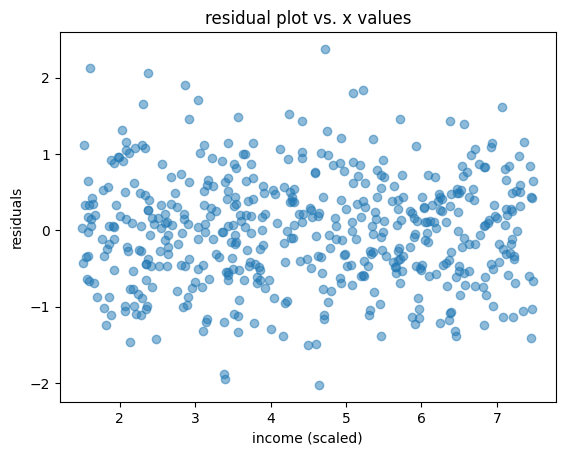

In [21]:
plt.scatter(df_income['income'], residuals, alpha=0.5)
plt.xlabel("income (scaled)")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

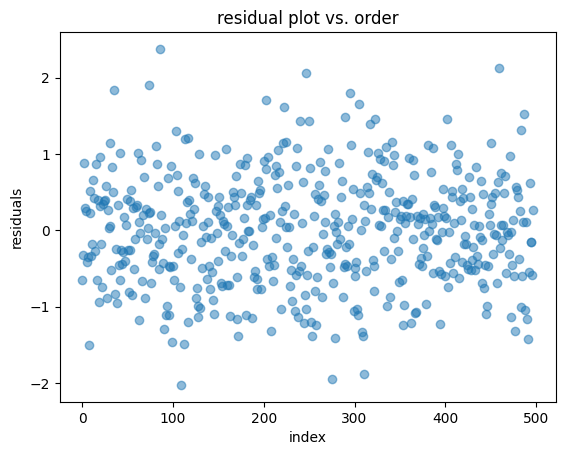

In [22]:
plt.scatter(range(len(df_income['income'])), residuals, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

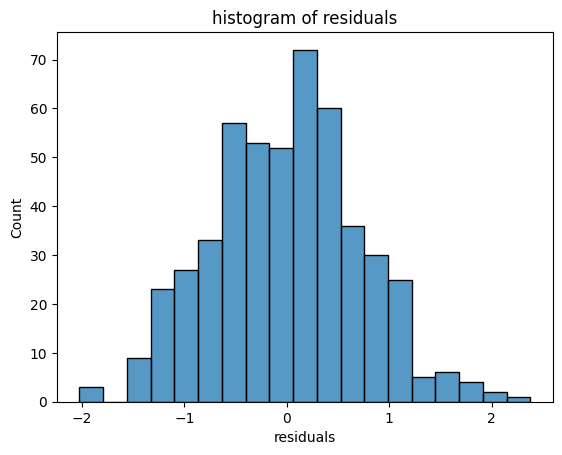

In [23]:
sns.histplot(residuals, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

In [24]:
predictions = income_lm[1] + income_lm[0]*df_income['income']
df_income['happiness'].corr(predictions)

0.8656337299833716

In [25]:
df_income['happiness'].corr(predictions)**2

0.7493217544849248

##Part 2.1
Discuss firstly, in a few sentences, whether you believe linear regression model is appropriate for analyzing these data based on the plots presented. Make sure to note if all four of the following assumptions seem justified, and how you know:

- Linearity
- Independence
- Normality
- Constant Standard Deviation


Linearity: Does seem justified because we know the data is linear as we can see through both the residual plots, because even though both plots are scattered, there is a certain density nearer to one and the points are evenly distributed 

Independence: The linear regression model is also independent because it does not show any clear trends or patterns in the residuals

Normal: A bell shaped curve can be seen showing a normal distribution while drawing the histogram. Although this isnt completely accounted for as the assumptions have not been completely met.

Constant SD: If a normal distribution can successfully be shown there should be a constant SD, with the assumptions only being met if the SD across all residuals is the same. 



## Part 2.2
Interpret both the intercept and slope in the context of the problem. 

**Note** that the two variables (`income` and `happiness`) are on non-intuitive scales; simply use generic "units" when discussing them (i.e. observation one has 3.86 income units and 2.31 happiness units).


The intercept in the context of this problem is 4.85 units which is the happiness value when income is 0. and the slope is around -0.0016 which means for every unit increase in income there is a slight decrease in happiness levels

## Part 2.3
Report $R^2$ as a percentage and interpret it in the context of the problem. Is this a good $R^2$ value? What does it mean?

R^2 as a percentage is 74.9% which means that happiness and mooney have a 74.9% relation to each other. 

## Part 2.4
Based on these data, make a final conclusion about whether the model is useful, and whether (assuming that the data are real and representative of the population) if the data tend to support (or do not support) the statement that money can't buy happiness?

Although not well established, the model is relatively useful in assuming if money can buy happiness as a good amount of correlation can be seen between income and happiness levels, through a variety of graphs.

# Part 3: Design a Bayes Net (30 points)
In this part, you will come up with a problem suitable for analysis via a Bayes Net on a topic of your choosing. You must:

- design a Bayesian network on three or four nodes
    - too many nodes and the joint distribution table has too many rows ...
- ask 2 questions which build towards some intuition
    - demonstrate / explain a conditional independence relationship
    - demonstrate some intuition encapsulated in the network:
        - e.g. in HW9 Problem 6: "defending a basketball shot decreases the expected points earned"

Your submission should include 4 items:
- a description of the variables and their possible values in the network
  - the image of the Bayes net (see below)
- the two questions you wish to answer using the Bayes net
  - the set up to the solutions (in algebraic form, with probability statements) of the questions using information from the network

##Part 3.1(a)
Describe your Bayesian Network in the first cell below and then include an image of the Bayes net in the second cell. The instructions for how to do this are in the second cell below.

My Bayesian network is going to consist of 3 nodes. A star player of a team being injured, losing a soccer match and if the weather is sunny. as will be shown below, the star player being injured is conditionally independent to the weather being sunny. Image has been submitted on canvas.

##Part 3.1(b): Uploading an image into a jupyter notebook
To create the image of your bayes net 
- be sure to specify the probabilities of interest at each node
- generate an image:
    - draw one and take a picture with your phone
        - cam scanner please
    - build it on the computer
    - draw on a tablet
- upload into the notebook by:
    - uploading your image to [https://imgbb.com/](https://imgbb.com/)
    - double clicking this jupyter cell
    - replacing the hyperlink below with a hyperlink to your image
        - (should have similar format as the example given)
        - try right clicking "copy image address" or similar

<img src="https://i.ibb.co/6rLKcSy/bayes-basketball.png" width=400px>

##Part 3.2
Ask your two questions in each of the two cells below, and provide the entire operation using probability statement(s) needed to calculate the answer to the question you've come up with.

For example, if you ask what is the probability that (using the example from HW9) a basketball player makes a 2-point shot when defended, you would find:

$$P(M_1,R_2|D_1) = P(M_1|D_1,R_2)P(R_2)$$

Or, if you ask if defending a basketball shot decreases the expected points earned, you would find:

$$E(P|D_1) - E(P|D_0)$$

where, $E(P|D_i) = 0P(P_0|D_i) + 2P(P_2|D_i) + 3P(P_3|D_i)$

and $P(P_j|D_i) = \sum_{M,R} P(P_j|M,R) P(M,R|D_i)$

q1. Given that it is sunny, what is the probability that we lose a soccer match

Ans. P(Lose soccer game | Weather = Sunny) = P(Weather = Sunny | Lose a soccer game) * P(Lose a soccer game) / P(Weather = Sunny)

q2. Is the probability that a star player is injured independent of whether a team loses a soccer match, given that it is sunny

ans. P(Lose the soccer game | Sunny, Injury) = P(Lose the soccer game | Sunny)

This represents our Conditional independence relation. We can see that losing a game and it being sunny outside are both directly dependent on whether you have an injured player. which means if we know the value of the probability that the star player is injured then it being sunny or losing a game is already accounted for. If a player gets injured there is a higher probablity of losing the game, if it is sunny there is an ever higher probability that they will lose the game. We know if a player is injured the weathers probability of being or not being is already taken into account. 